# Importing the libraries

In [1]:
import collections
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import curve_fit

# Reading and displaying the graph

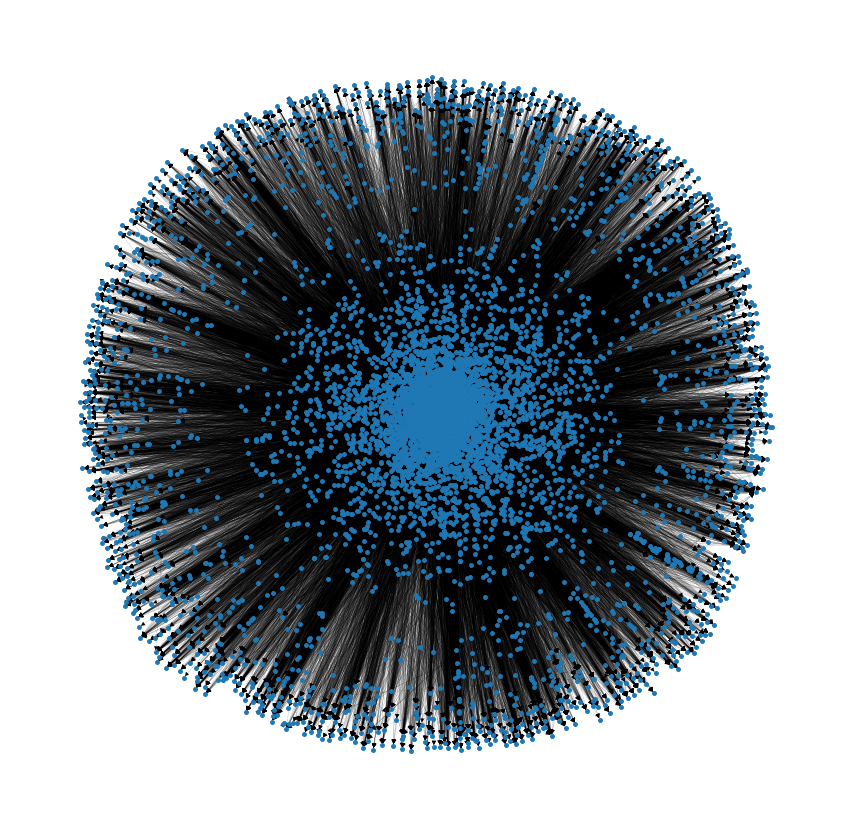

In [2]:
G=nx.read_edgelist("data.txt", create_using=nx.DiGraph(), nodetype=int)
fig, ax=plt.subplots(figsize=(15,15))
nx.draw(G, node_size=15, width=0.1, ax=ax)

# Computing the main metrics of the graph and the giant component

In [3]:
nodes=G.number_of_nodes()
edges=G.number_of_edges()
average_degree=edges/nodes
density=average_degree/(nodes-1)
global_clustering=nx.transitivity(G)
average_clustering=nx.average_clustering(G)
assortativity=nx.degree_pearson_correlation_coefficient(G)

if(nx.is_strongly_connected(G)==False):
    print("The graph is not strongly connected.")
    graph_connected_components=sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    giant_component=G.subgraph(graph_connected_components[0])
    giant_component_nodes=giant_component.number_of_nodes()
    giant_component_edges=giant_component.number_of_edges()
    giant_component_diameter=nx.diameter(giant_component)
    giant_component_average_degree=giant_component_edges/giant_component_nodes
    giant_component_density=giant_component_average_degree/(giant_component_nodes-1)
    giant_component_global_clustering=nx.transitivity(giant_component)
    giant_component_average_clustering=nx.average_clustering(giant_component)
    giant_component_average_shortest_path_length=nx.average_shortest_path_length(giant_component)
    giant_component_assortativity=nx.degree_pearson_correlation_coefficient(giant_component)
    
print("Graph's size: ", nodes)
print("Graph's number of edges: ", edges)
print("Graph's average degree: ", average_degree)
print("Graph's density: ", density)
print("Graph's global clustering: ", global_clustering)
print("Graph's average clustering: ", average_clustering)
print("Graph's assortativity: ", assortativity)
print("Giant component's size: ", giant_component_nodes)
print("Giant component's number of edges: ", giant_component_edges)
print("Giant component's diameter: ", giant_component_diameter)
print("Giant component's average degree: ", giant_component_average_degree)
print("Giant component's density: ", giant_component_density)
print("Giant component's global clustering: ", giant_component_global_clustering)
print("Giant component's average clustering: ", giant_component_average_clustering)
print("Giant component's average shortest path lenght: ", giant_component_average_shortest_path_length)
print("Giant component's assortativity: ", giant_component_assortativity)

The graph is not strongly connected.
Graph's size:  7115
Graph's number of edges:  103689
Graph's average degree:  14.573295853829936
Graph's density:  0.0020485375110809584
Graph's global clustering:  0.05285122817867548
Graph's average clustering:  0.08156344522820935
Graph's assortativity:  -0.08324455771686863
Giant component's size:  1300
Giant component's number of edges:  39456
Giant component's diameter:  9
Giant component's average degree:  30.35076923076923
Giant component's density:  0.023364718422455143
Giant component's global clustering:  0.08512174620084431
Giant component's average clustering:  0.18221830113253618
Giant component's average shortest path lenght:  2.8792828803221413
Giant component's assortativity:  -0.06306021987134619


# Computing the top ten nodes by degree, betweenness and closeness

In [4]:
top_ten_nodes_by_degree=sorted(list(G.degree()), key=lambda tup: tup[1], reverse=True)
top_ten_nodes_by_degree=top_ten_nodes_by_degree[:10]
print("Top ten nodes by degree")
print(top_ten_nodes_by_degree)
print("")

betweenness=nx.betweenness_centrality(G)
top_ten_nodes_by_betweenness=sorted(betweenness.items(), key=lambda tup: tup[1], reverse=True)
top_ten_nodes_by_betweenness=top_ten_nodes_by_betweenness[:10]
print("Top ten nodes by betweenness")
print(top_ten_nodes_by_betweenness)
print("")

closeness=nx.closeness_centrality(G)
top_ten_nodes_by_closeness=sorted(closeness.items(), key=lambda tup: tup[1], reverse=True)
top_ten_nodes_by_closeness=top_ten_nodes_by_closeness[:10]
print("Top ten nodes by closeness")
print(top_ten_nodes_by_closeness)

Top ten nodes by degree
[(2565, 1167), (1549, 832), (766, 773), (11, 743), (1166, 743), (457, 732), (2688, 618), (1374, 551), (1151, 543), (5524, 538)]

Top ten nodes by betweenness
[(2565, 0.017654409558147836), (1549, 0.016564095998753692), (15, 0.01156258726064681), (72, 0.008011822532712367), (737, 0.006134997021063534), (1166, 0.0058025468349323876), (5079, 0.005438230580659507), (2328, 0.005202347375831278), (2237, 0.004714826895715726), (28, 0.004563992520641177)]

Top ten nodes by closeness
[(4037, 0.29648297322467565), (15, 0.29148957578089163), (2398, 0.2909224754389055), (1549, 0.28192713494645066), (2535, 0.27990070450658394), (3089, 0.2780478846701328), (762, 0.2780065300356909), (5412, 0.27781815890206973), (2565, 0.277614273681118), (5254, 0.2765668276533207)]


# Analyzing the degree distribution

### Normal scale 

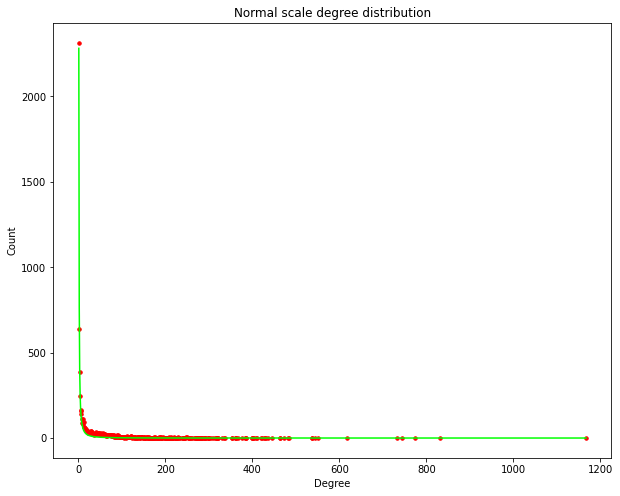

In [5]:
degree_sequence=sorted([d for n, d in G.degree()])
degree_count=collections.Counter(degree_sequence)
degree, count=zip(*degree_count.items())
degree=np.array(degree)
count=np.array(count)

def f(k, c, gamma):
    return  k**(-gamma) * c

popt, pcov=curve_fit(f, degree, count)

plt.figure(figsize=(10,8))          
plt.scatter(degree, count, s=12, color='red')
plt.title("Normal scale degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.plot(degree, f(degree, *popt), color='lime')
plt.show()

### Double logarithmic scale

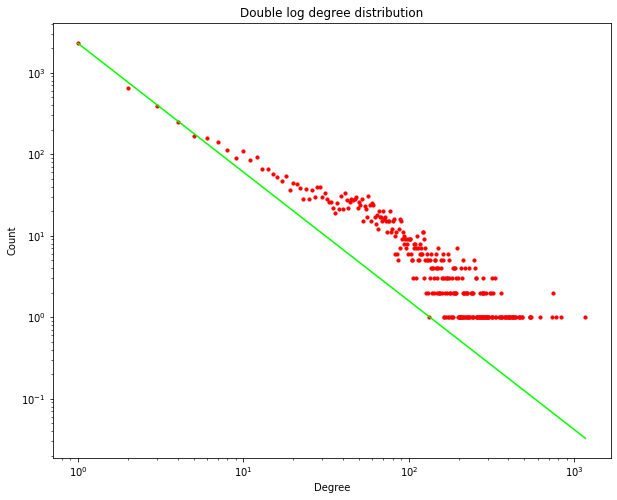

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(degree, count, s=10, color='red')
plt.plot(degree, f(degree, *popt), color='lime')
plt.title("Double log degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')
plt.show()